# read in combined CARIACO csv

In [256]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [257]:
pd_CARIACO = pd.read_csv("../DATA/Combined_CARIACO_data_v2.csv")

In [258]:
pd_CARIACO['time_month_dt'] = pd.to_datetime(pd_CARIACO['time_month'])

In [259]:
pd_CARIACO = pd_CARIACO.drop(labels='Unnamed: 0', axis=1)

In [260]:
pd_CARIACO = pd_CARIACO.set_index('time_month_dt')
pd_CARIACO.index.rename('time', inplace=True)

In [261]:
## get metadata from the original netcdf files!

In [262]:
#pd.DataFrame(data={'par_names':pd_CARIACO.columns.values}).to_csv('CombinedCARIACOannotations.csv')

# convert to xarray dataset

In [263]:
from datetime import date

today = date.today()

In [264]:
str(today)

'2021-12-15'

In [265]:
metadata = {'creator': 'Benjamin Post', 'creation date': str(today)}
CARIACO = xr.Dataset.from_dataframe(pd_CARIACO)
CARIACO.attrs = metadata

# add Metadata programmatically
- add clear text variable names
- add units
- add data source
- add data group (biological, physical, chemical)

In [266]:
wind_meta = pd.read_csv("META/ERA5_META.csv")
wind_meta.columns

Index(['Unnamed: 0', 'GRIB_paramId', 'GRIB_shortName', 'GRIB_units',
       'GRIB_name', 'GRIB_cfVarName', 'GRIB_dataType', 'GRIB_missingValue',
       'GRIB_numberOfPoints', 'GRIB_totalNumber', 'GRIB_typeOfLevel',
       'GRIB_NV', 'GRIB_stepUnits', 'GRIB_stepType', 'GRIB_gridType',
       'GRIB_gridDefinitionDescription', 'GRIB_Nx',
       'GRIB_iDirectionIncrementInDegrees', 'GRIB_iScansNegatively',
       'GRIB_longitudeOfFirstGridPointInDegrees',
       'GRIB_longitudeOfLastGridPointInDegrees', 'GRIB_Ny',
       'GRIB_jDirectionIncrementInDegrees', 'GRIB_jPointsAreConsecutive',
       'GRIB_jScansPositively', 'GRIB_latitudeOfFirstGridPointInDegrees',
       'GRIB_latitudeOfLastGridPointInDegrees', 'long_name', 'units',
       'custom_name', 'GRIB_cfName', 'standard_name'],
      dtype='object')

In [267]:
niskin_meta = pd.read_csv("META/Niskin_PARAMETERS.csv", sep='\t')
niskin_meta

,Parameter,Description,Units
0,Cruise_number,number of cruise,integer (nnn)
1,Cruise_ID_1,cruise ID for OCB,alphanumeric
2,Cruise_ID_2,cruise ID for the CARIACO project,alphanumeric
3,Leg,number of cruise in the same month,integer (n)
4,Day,day of sampling in dd format,unitless
...,...,...,...
91,ISO_DateTime_end_hc_UTC,end date and time of hydrocast in UTC in ISO 8...,unitless
92,ISO_DateTime_start_bc_UTC,start time of biocast in UTC in ISO 8601 format,unitless
93,ISO_DateTime_end_bc_UTC,end time of biocast in UTC in ISO 8601 format,unitless
94,Latitude,Latitude of observations with positive values ...,decimal degrees


In [280]:
zoo_meta = pd.read_csv("META/Zooplankton_PARAMETERS.csv", sep='\t')
#zoo_meta

## Source Metadata Loop

In [282]:
for var in CARIACO.data_vars:
    
    # add wind data METADATA
    wrow = wind_meta.loc[wind_meta['GRIB_cfVarName'] == var]
    if len(wrow) > 0:        
        CARIACO[var].attrs.update({'long_name':wrow['GRIB_name'].values[0],
                                  'units':wrow['GRIB_units'].values[0]})

    # add Niskin METADATA
    nrow = niskin_meta.loc[niskin_meta['Parameter'] == var]
    if len(nrow) > 0:
        CARIACO[var].attrs.update({'long_name':nrow['Description'].values[0],
                                  'units':nrow['Units'].values[0]})

## Manual metadata for computed values

In [283]:
CARIACO

<xarray.Dataset>
Dimensions:                       (time: 256)
Coordinates:
  * time                          (time) datetime64[ns] 1995-11-01 ... 2017-0...
Data variables:
    cdww                          (time) float64 0.0009123 ... 0.0009537
    iews                          (time) float64 -0.05435 -0.05757 ... -0.06034
    inss                          (time) float64 -0.02569 -0.0315 ... -0.03415
    mcc                           (time) float64 0.0971 0.07148 ... 0.1155
    mwp                           (time) float64 5.125 5.149 ... 4.967 5.255
    si10                          (time) float64 6.114 6.505 ... 7.692 6.772
    sp                            (time) float64 1.011e+05 ... 1.013e+05
    sst                           (time) float64 300.7 299.3 ... 300.4 298.1
    t2m                           (time) float64 299.7 298.9 ... 299.5 298.0
    tauoc                         (time) float64 0.9785 0.9752 ... 0.9584 0.9724
    u10                           (time) float64 -5.306 -5.446 ... -6.838 -5.638
    ust                           (time) float64 -0.04214 -0.04413 ... -0.04574
    v10                           (time) float64 -2.556 -3.062 ... -3.034 -3.3
    v10n                          (time) float64 -2.637 -3.117 ... -3.089 -3.32
    vst                           (time) float64 -0.02757 -0.03264 ... -0.03543
    wind                          (time) float64 4.537 4.765 ... 5.656 4.975
    time_month                    (time) object '11-1995' ... '01-2017'
    cdir                          (time) int64 19084480 18168832 ... 18562832
    e                             (time) float64 -0.003558 ... -0.002196
    ewss                          (time) float64 -5.507e+03 ... -5.803e+03
    i10fg                         (time) float64 8.638 8.923 ... 10.48 9.065
    lsp                           (time) float64 0.0002081 ... 0.0001184
    magss                         (time) float64 6.192e+03 ... 6.829e+03
    mer                           (time) float64 -4.118e-05 ... -2.541e-05
    metss                         (time) float64 -0.06372 -0.06729 ... -0.06713
    mmtss                         (time) float64 0.07169 0.07819 ... 0.07905
    mntss                         (time) float64 -0.02875 -0.03522 ... -0.03676
    mtpr                          (time) float64 1.188e-05 ... 2.491e-06
    nsss                          (time) float64 -2.489e+03 ... -3.18e+03
    sshf                          (time) int64 -668755 -253528 ... -759335 5848
    tp                            (time) float64 0.001027 ... 0.0002142
    O2_ml_L                       (time) float64 4.067 3.439 ... 3.642 3.194
    O2_umol_kg                    (time) float64 177.3 149.8 ... 158.7 139.1
    NO3_UDO                       (time) float64 0.9218 3.095 7.512 ... nan nan
    PO4_UDO                       (time) float64 0.06163 0.2114 ... nan nan
    SiO4_UDO                      (time) float64 2.127 3.869 4.868 ... nan nan
    NH4_USF                       (time) float64 nan nan nan ... 0.1463 0.4244
    NO2_USF                       (time) float64 nan nan nan ... 0.1118 0.09568
    NO3_NO2_USF                   (time) float64 nan nan nan ... nan 3.183 5.193
    PO4_USF                       (time) float64 nan nan nan ... 0.2175 0.3763
    SiO4_USF                      (time) float64 nan nan nan ... nan 2.206 2.49
    pH                            (time) float64 nan 8.006 7.984 ... 7.984 7.942
    Alkalinity_mol_kg             (time) float64 0.002407 0.002409 ... 0.002211
    Alkalinity_umol_kg            (time) float64 2.407e+03 ... 2.211e+03
    TCO2                          (time) float64 nan 2.108e+03 ... 1.962e+03
    fCO2                          (time) float64 nan 433.7 444.5 ... 484.7 452.6
    pH_corrected                  (time) float64 nan 8.011 7.989 ... 7.996 7.953
    TCO2_corrected                (time) float64 nan 2.105e+03 ... 1.956e+03
    fCO2_corrected                (time) float64 nan 427.5 438.1 ... 469.8 439.6
    Salinity_bottles          

### CTD META

In [ ]:
CARIACO.Isopycnal_21.attrs.update({})
CARIACO.MLD_potemp.attrs.update({})

### Phytoplankton META

In [286]:
for var in CARIACO.data_vars:
    if var.startswith('counts'):
        CARIACO[var].attrs.update({'units':'cells/ml'})
    elif var.startswith('SR'):
        CARIACO[var].attrs.update({'units':'number of species'})

CARIACO.species_richness.attrs.update({'units':'number of species'})

### Zooplankton META

In [287]:
CARIACO.Mesh200.attrs.update({'units':'mg/m^3'})
CARIACO.Mesh500.attrs.update({'units':'mg/m^3'})
CARIACO.total_biomass.attrs.update({'units':'mg/m^3'})

In [316]:
#chl_pd.values
from matplotlib.pyplot import figure
def plot_yearmonth_cmap(data, bottom0=False, negativemax=False):
    
    figure(figsize=(7, 8), dpi=80)
    data_pd = data.to_dataframe()
    
    dat_pivot = (data_pd.assign(year=data_pd.index.year, month=data_pd.index.month)#.unstack()
      .pivot_table(index='year', columns='month', values=data.name)
    )
    ax = plt.gca()
    if negativemax == True:
        c = plt.pcolormesh(dat_pivot, cmap='cividis_r')
    else:
        c = plt.pcolormesh(dat_pivot, cmap='cividis')
        
    cbar = plt.colorbar(c)
    
    #print(data.attrs['long_name'])
    
    cbar.set_label(data.attrs['long_name'] + ' ' + data.attrs['units'])
    if bottom0 == True:
        plt.clim(0)
    else:
        pass
    
    ax.set_yticks(np.arange(0,len(dat_pivot.index.values)))
    ax.set_yticklabels(dat_pivot.index.values)
    ax.set_ylabel('Years')
    
    ax.set_xticks(np.arange(0,12)+1-0.5)
    ax.set_xticklabels(np.arange(1,13))
    ax.set_xlabel('Months')

    plt.show()

<Figure size 560x640 with 0 Axes>

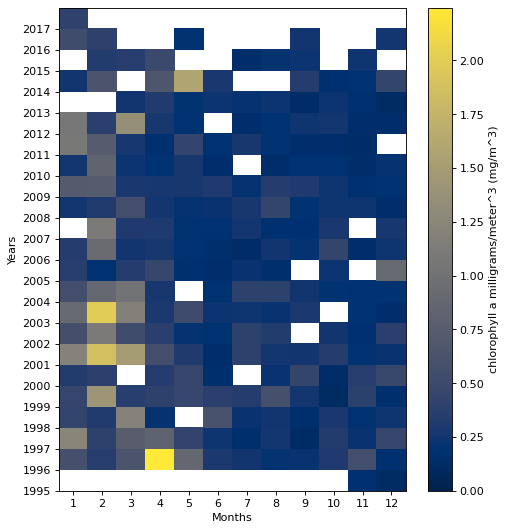

In [317]:
from matplotlib.pyplot import figure
figure(figsize=(7, 8), dpi=80)

plot_yearmonth_cmap(CARIACO.Chlorophyll, bottom0=True)

In [219]:
#CARIACO.u10

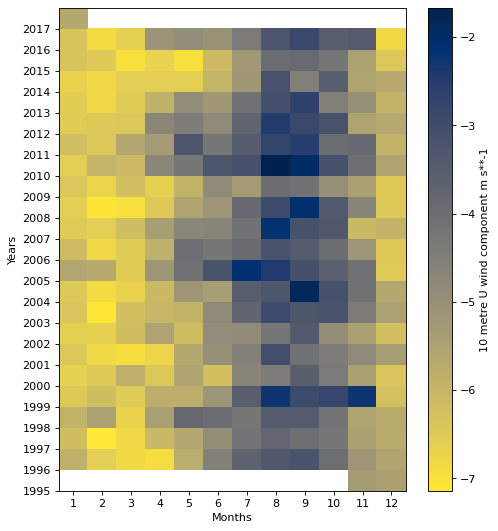

In [318]:
plot_yearmonth_cmap(CARIACO.u10, negativemax=True)

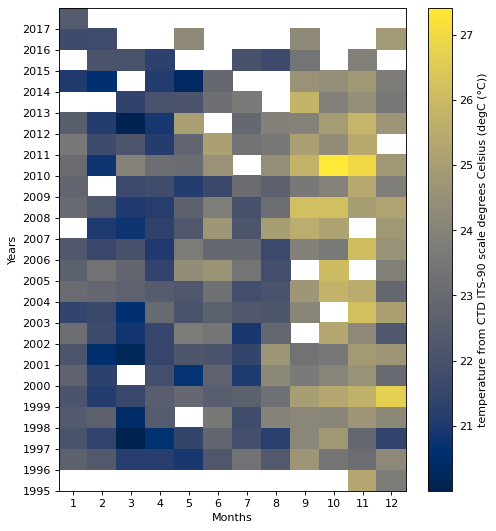

In [322]:
plot_yearmonth_cmap(CARIACO.Temperature)

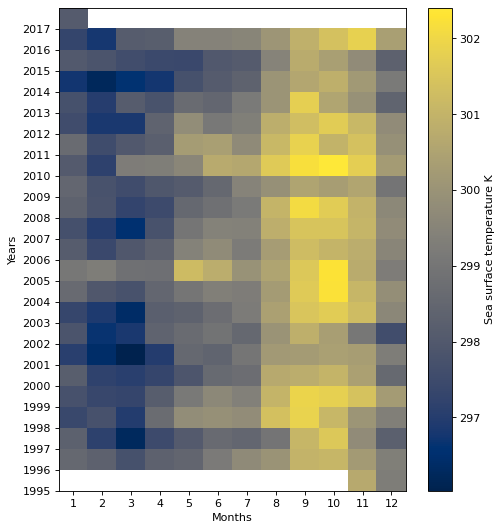

In [321]:
plot_yearmonth_cmap(CARIACO.sst)

# export to ncdf for plotting etc.